# diagnostics of Jan WACCM chemistry

## Reference to the AMWG diagnostic package

latlon, vertical zonal mean, vertical profiles of 'H2O','O2','O','H','OH','O3', 'CH4','N2O', 'CO'

- Soudeh's run is 140Km 70L WACCM-MPAS MA chemistry with 1 deg horizontal resolution
- Doug's run is SD-WACCM6 MERRA2 (70Level, 1-deg)

We will use the regridded daily output, avearge to get monthly mean for Soudeh's run
compare with the Jan of 2001 of Dough's run

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cf_units as cf
from geocat.viz import util as gvutil
#from geocat.viz import cmaps as gvcmaps


In [ ]:
import dask
from dask_jobqueue import PBSCluster
from dask.distributed import Client


In [16]:
cluster = PBSCluster(
    cores=1, # The number of cores you want
    memory='50GB', # Amount of memory
    processes=1, # How many processes
    queue='casper', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
    local_directory='$TMPDIR', # Use your local directory
    resource_spec='select=1:ncpus=1:mem=50GB', # Specify resources
    project='p93300313', # Input your project ID here
    walltime='03:00:00', # Amount of wall time
    interface='ext', # Interface to use
)

# Scale up
cluster.scale(12)

# Change your url to the dask dashboard so you can see it
dask.config.set({'distributed.dashboard.link':'https://jupyterhub.hpc.ucar.edu/stable/user/huili7/proxy/127.0.0.1:8787/status'})

# Setup your client
client = Client(cluster)


/glade/work/huili7/miniconda3/envs/geocat_env/lib/python3.7/site-packages/distributed/node.py:164: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45831 instead
  expected, actual


In [5]:
datas2 = xr.open_dataset('/glade/campaign/cgd/ccr/huili7/FWma2000climo_mpasa120_frontogenGW_January_epssm_60K_Chemistery_4Hui/atm/hist/FWma2000climo_mpasa120_frontogenGW_January_epssm_60K_Chemistery_4Hui.cam.h0.0001-01.nc')
datas2.lev

<xarray.DataArray 'lev' (lev: 70)>
array([1.327835e+05, 1.292835e+05, 1.257835e+05, 1.222835e+05, 1.187835e+05,
       1.152834e+05, 1.117834e+05, 1.082834e+05, 1.047834e+05, 1.012832e+05,
       9.778232e+04, 9.427980e+04, 9.077502e+04, 8.726819e+04, 8.375985e+04,
       8.025065e+04, 7.674373e+04, 7.325029e+04, 6.979663e+04, 6.642934e+04,
       6.321270e+04, 6.021335e+04, 5.747729e+04, 5.501171e+04, 5.278270e+04,
       5.073068e+04, 4.879429e+04, 4.692870e+04, 4.510998e+04, 4.332898e+04,
       4.158331e+04, 3.987257e+04, 3.819674e+04, 3.655584e+04, 3.494987e+04,
       3.337881e+04, 3.184265e+04, 3.034140e+04, 2.887505e+04, 2.744362e+04,
       2.604710e+04, 2.468543e+04, 2.335791e+04, 2.206196e+04, 2.079240e+04,
       1.954399e+04, 1.831617e+04, 1.711305e+04, 1.593665e+04, 1.478177e+04,
       1.363887e+04, 1.250034e+04, 1.136275e+04, 1.022525e+04, 9.087827e+03,
       7.951349e+03, 6.820235e+03, 5.708036e+03, 4.642614e+03, 3.664244e+03,
       2.814198e+03, 2.119940e+03, 1.585418e+03, 1.190424e+03, 8.991384e+02,
       6.743539e+02, 4.892296e+02, 3.297228e+02, 1.891224e+02, 6.146166e+01])
Coordinates:
  * lev      (lev) float64 1.328e+05 1.293e+05 1.258e+05 ... 329.7 189.1 61.46
Attributes:
    long_name:  zeta level at vertical midpoints
    units:      m

In [6]:
datas = xr.open_dataset('/glade/campaign/cgd/ccr/huili7/FWma2000climo_mpasa120_frontogenGW_January_epssm_60K_Chemistery_4Hui/Jan_Daily/latlon_Janmean.nc')
datas

<xarray.Dataset>
Dimensions:     (latitude: 360, longitude: 720, Time: 1, nVertLevels: 70)
Coordinates:
  * latitude    (latitude) float32 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude   (longitude) float32 -179.7 -179.2 -178.7 ... 178.7 179.2 179.7
Dimensions without coordinates: Time, nVertLevels
Data variables: (12/14)
    U           (Time, nVertLevels, latitude, longitude) float64 ...
    V           (Time, nVertLevels, latitude, longitude) float64 ...
    T           (Time, nVertLevels, latitude, longitude) float64 ...
    H2O         (Time, nVertLevels, latitude, longitude) float64 ...
    O           (Time, nVertLevels, latitude, longitude) float64 ...
    H           (Time, nVertLevels, latitude, longitude) float64 ...
    ...          ...
    CH4         (Time, nVertLevels, latitude, longitude) float64 ...
    N2O         (Time, nVertLevels, latitude, longitude) float64 ...
    CO          (Time, nVertLevels, latitude, longitude) float64 ...
    OMEGA       (Time, nVertLevels, latitude, longitude) float64 ...
    PMID        (Time, nVertLevels, latitude, longitude) float64 ...
    UTGW_TOTAL  (Time, nVertLevels, latitude, longitude) float64 ...
Attributes:
    history:  Fri Oct 27 18:17:08 2023: ncra latlon_01.nc latlon_02.nc latlon...
    NCO:      netCDF Operators version 5.1.6 (Homepage = http://nco.sf.net, C...

now read in Doug's data

In [15]:
datad = xr.open_dataset('/glade/scratch/dkin/archive/f.e22.FWHISTnudged.f09_f09.cesm2.2.0.2001-2021.001/atm/hist/f.e22.FWHISTnudged.f09_f09.cesm2.2.0.2001-2021.001.cam.h0.2001-01.nc')
datad

<xarray.Dataset>
Dimensions:                  (lat: 192, zlon: 1, nbnd: 2, lon: 288, lev: 70,
                              ilev: 71, time: 1)
Coordinates:
  * lat                      (lat) float64 -90.0 -89.06 -88.12 ... 89.06 90.0
  * zlon                     (zlon) float64 0.0
  * lon                      (lon) float64 0.0 1.25 2.5 ... 356.2 357.5 358.8
  * lev                      (lev) float64 5.96e-06 9.827e-06 ... 976.3 992.6
  * ilev                     (ilev) float64 4.5e-06 7.42e-06 ... 985.1 1e+03
  * time                     (time) object 2001-02-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/1000)
    zlon_bnds                (zlon, nbnd) float64 ...
    gw                       (lat) float64 ...
    hyam                     (lev) float64 ...
    hybm                     (lev) float64 ...
    P0                       float64 ...
    hyai                     (ilev) float64 ...
    ...                       ...
    soa5_c1SFWET             (time, lat, lon) float32 ...
    soa5_c2                  (time, lev, lat, lon) float32 ...
    soa5_c2DDF               (time, lat, lon) float32 ...
    soa5_c2SFWET             (time, lat, lon) float32 ...
    wet_deposition_NHx_as_N  (time, lat, lon) float32 ...
    wet_deposition_NOy_as_N  (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              f.e22.FWHISTnudged.f09_f09.cesm2.2.0.2001-2021.001
    logname:           dkin
    host:              cheyenne4
    initial_file:      /glade/p/cesmdata/cseg/inputdata/cesm2_init/b.e21.BWHI...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [16]:
datad2 = xr.open_dataset('/glade/scratch/dkin/archive/f.e22.FWHISTnudged.f09_f09.cesm2.2.0.2001-2021.001/atm/hist/f.e22.FWHISTnudged.f09_f09.cesm2.2.0.2001-2021.001.cam.h1.2001-01-02-00000.nc')
datad2

<xarray.Dataset>
Dimensions:       (lat: 192, lon: 288, lev: 70, ilev: 71, time: 10, nbnd: 2)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lev           (lev) float64 5.96e-06 9.827e-06 1.62e-05 ... 976.3 992.6
  * ilev          (ilev) float64 4.5e-06 7.42e-06 1.223e-05 ... 985.1 1e+03
  * time          (time) object 2001-01-02 00:00:00 ... 2001-01-11 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/77)
    gw            (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    ...            ...
    r_het15       (time, lev, lat, lon) float32 ...
    r_het2        (time, lev, lat, lon) float32 ...
    r_het3        (time, lev, lat, lon) float32 ...
    r_het4        (time, lev, lat, lon) float32 ...
    r_het5        (time, lev, lat, lon) float32 ...
    r_het6        (time, lev, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              f.e22.FWHISTnudged.f09_f09.cesm2.2.0.2001-2021.001
    logname:           dkin
    host:              cheyenne4
    initial_file:      /glade/p/cesmdata/cseg/inputdata/cesm2_init/b.e21.BWHI...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  day_1

In [24]:
datad.O3.lev[51]

<xarray.DataArray 'lev' ()>
array(168.22507977)
Coordinates:
    lev      float64 168.2
Attributes:
    long_name:      hybrid level at midpoints (1000*(A+B))
    units:          hPa
    positive:       down
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate
    formula_terms:  a: hyam b: hybm p0: P0 ps: PS

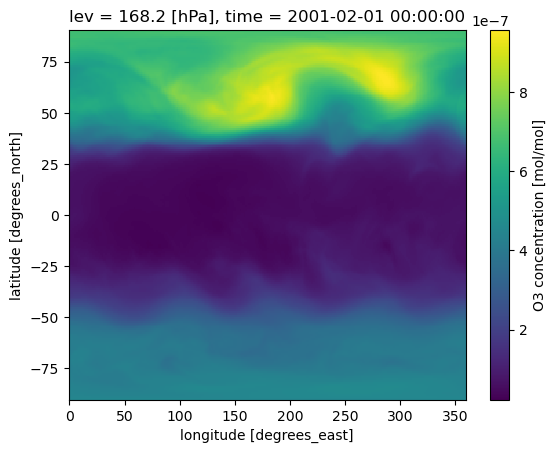

In [26]:
datad.O3[0,51,:,:].plot()

In [10]:
datas_new=datas.roll(longitude=360)
datas_new['longitude'] = (datas.longitude.data+180)

In [7]:
datas3 = xr.open_dataset('/glade/campaign/cgd/ccr/huili7/FWma2000climo_mpasa120_frontogenGW_January_epssm_60K_Chemistery_4Hui/Jan_Daily/latlon_02.nc', 
                        #chunks = {'Time':8}
                        )


In [8]:
datas3 = datas3.assign_coords(longitude=(((datas3.longitude + 360) % 360)))

In [9]:
datas3 = datas3.sortby('longitude')

<xarray.DataArray 'lev' ()>
array(13638.86798744)
Coordinates:
    lev      float64 1.364e+04
Attributes:
    long_name:  zeta level at vertical midpoints
    units:      m


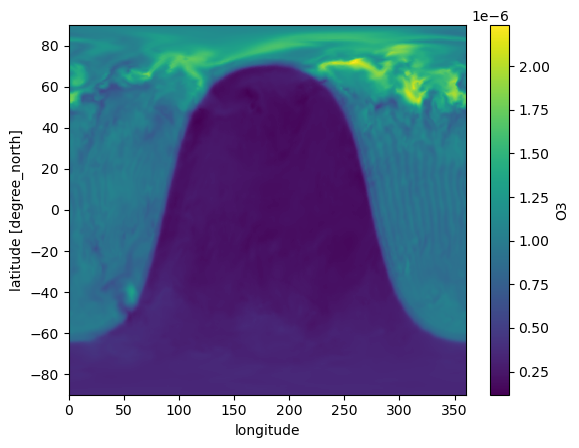

In [14]:
itime = 0
ilev = 50
print(datas2.lev[ilev])
datas3.O3[itime, ilev].plot()

###  Note that the two files have differnt vertical coordinates and different latlon 

datas uses zeta coordinate with geometric height, have variable PMID, the pressure at mid layer
datad uses hybrid coordinate, hybrid level coordinate is 1000*(A+B), unit hPa

We can convert datas to hybrid levels. Steps:
1. create new array 
2. modify datas to have its pressure as coordinate. 
3. sort from low to high, then interpolate pressure coordinate to sigma coordinate.  Need to do this at every lat/lon. 
4. write data into the new array


In [8]:
datas_regrid = datas_new.isel(Time=0).interp(latitude=datad.lat, longitude = datad.lon,
                        method='linear')

### now convert vertical coordinate

In [6]:
#datas_regrid.coords['nVertLevels'] = datad.lev.data


In [7]:
datas3_sigma = xr.open_dataset('datas_sigma.nc')
datas3_sigma

<xarray.Dataset>
Dimensions:      (nVertLevels: 70, lat: 192, lon: 288)
Coordinates:
    latitude     (lat) float64 ...
    longitude    (lon) float64 ...
  * lat          (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon          (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * nVertLevels  (nVertLevels) float64 5.96e-06 9.827e-06 ... 976.3 992.6
Data variables: (12/14)
    U            (nVertLevels, lat, lon) float64 ...
    V            (nVertLevels, lat, lon) float64 ...
    T            (nVertLevels, lat, lon) float64 ...
    H2O          (nVertLevels, lat, lon) float64 ...
    O            (nVertLevels, lat, lon) float64 ...
    H            (nVertLevels, lat, lon) float64 ...
    ...           ...
    CH4          (nVertLevels, lat, lon) float64 ...
    N2O          (nVertLevels, lat, lon) float64 ...
    CO           (nVertLevels, lat, lon) float64 ...
    OMEGA        (nVertLevels, lat, lon) float64 ...
    PMID         (nVertLevels, lat, lon) float64 ...
    UTGW_TOTAL   (nVertLevels, lat, lon) float64 ...
Attributes:
    history:  Fri Oct 27 18:17:08 2023: ncra latlon_01.nc latlon_02.nc latlon...
    NCO:      netCDF Operators version 5.1.6 (Homepage = http://nco.sf.net, C...

In [38]:
#datas_sigma = datas_regrid.copy(deep=True)
datas3_sigma = datas3.copy(deep=True)

In [32]:
# function to add pmid as vertical coordinate,prepare for interpolation to sigma level
def interp_p_sigma(inarray):
    tmp = inarray.assign_coords(nVertLevels=inarray['PMID'].data*0.01)
    return tmp.sortby(tmp.nVertLevels).interp(nVertLevels=datad.lev,method='linear')
    

In [36]:
nlat = datas3.latitude.size
nlon = datas3.longitude.size

In [37]:
#nlat = datas_regrid.lat.size
#nlon = datas_regrid.lon.size

In [43]:
datas3_sigma

<xarray.Dataset>
Dimensions:     (latitude: 360, longitude: 720, Time: 8, nVertLevels: 70)
Coordinates:
  * latitude    (latitude) float32 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude   (longitude) float32 -179.7 -179.2 -178.7 ... 178.7 179.2 179.7
Dimensions without coordinates: Time, nVertLevels
Data variables: (12/14)
    U           (Time, nVertLevels, latitude, longitude) float64 ...
    V           (Time, nVertLevels, latitude, longitude) float64 ...
    T           (Time, nVertLevels, latitude, longitude) float64 ...
    H2O         (Time, nVertLevels, latitude, longitude) float64 ...
    O           (Time, nVertLevels, latitude, longitude) float64 ...
    H           (Time, nVertLevels, latitude, longitude) float64 ...
    ...          ...
    CH4         (Time, nVertLevels, latitude, longitude) float64 ...
    N2O         (Time, nVertLevels, latitude, longitude) float64 ...
    CO          (Time, nVertLevels, latitude, longitude) float64 ...
    OMEGA       (Time, nVertLevels, latitude, longitude) float64 ...
    PMID        (Time, nVertLevels, latitude, longitude) float64 ...
    UTGW_TOTAL  (Time, nVertLevels, latitude, longitude) float64 ...

In [45]:
for ivar in ['O3']:
    print(ivar)
#ivar='O3', OH, N2O H20, CH4, CO
    for i in np.arange(1,nlat-1):
        print(i)
        for j in np.arange(1,nlon):
#        interp_array = interp_p_sigma(datas_regrid.isel(lat=i,lon=j))
            datas3_sigma.isel(latitude=i,longitude=j,Time=0)[ivar] = interp_p_sigma(datas3.isel(latitude=i,longitude=j,Time=0))[ivar]


O3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


KeyboardInterrupt: 

In [11]:
datas_sigma.to_netcdf('datas_sigma_all.nc')

## vertical contour plots

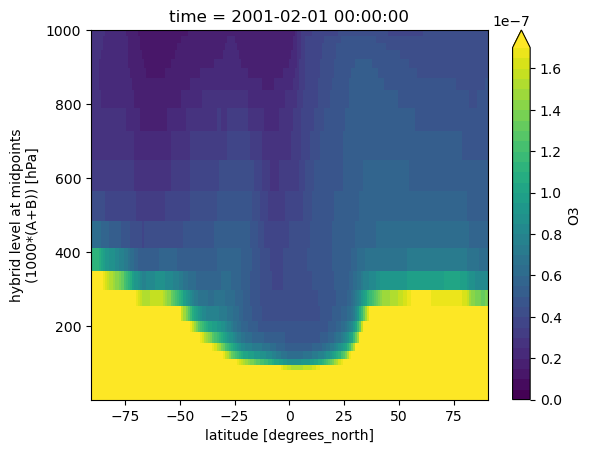

In [97]:
datad.O3.mean('lon')[0].plot(levels=np.linspace(0,1.7e-7, 35))

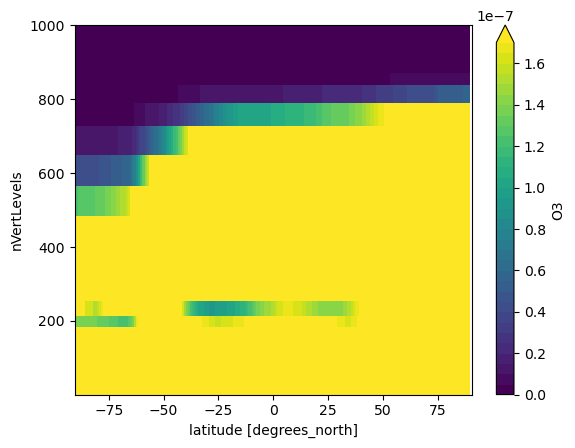

In [136]:
datas_sigma.O3.mean('lon').plot(levels=np.linspace(0,1.7e-7, 35))

In [37]:
print(datad.Z3[0,50].mean())

<xarray.DataArray 'Z3' ()>
array(13859.606, dtype=float32)
Coordinates:
    lev      float64 143.0
    time     object 2001-02-01 00:00:00


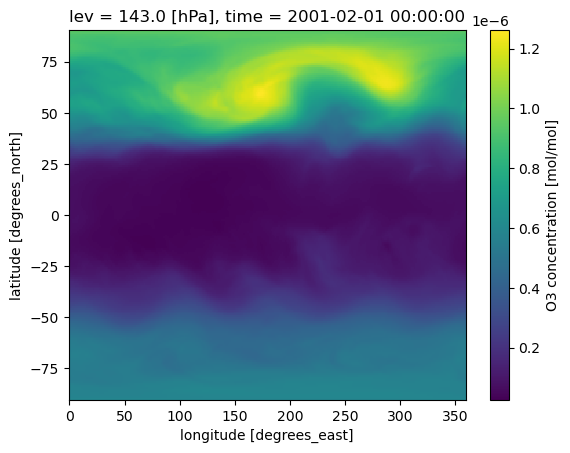

In [38]:
datad.O3[0,50].plot()

In [135]:
datas3.PMID[0,69].mean()

<xarray.DataArray 'PMID' ()>
array(0.00085542)

<xarray.DataArray 'lev' ()>
array(20792.39534915)
Coordinates:
    lev      float64 2.079e+04
Attributes:
    long_name:  zeta level at vertical midpoints
    units:      m


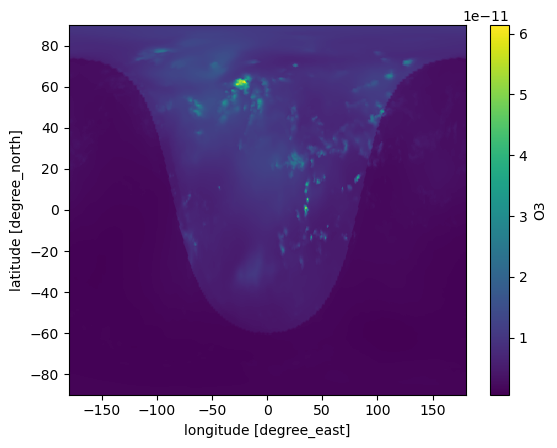

In [137]:
print(datas2.lev[44])
datas3.O3[0,69].plot()

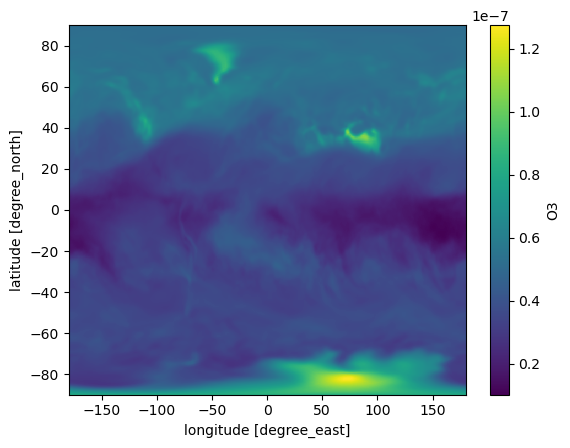

In [182]:
datas.O3[0,12].plot() 

In [174]:
datad.lev[60]    pressure increase

<xarray.DataArray 'lev' ()>
array(691.38943031)
Coordinates:
    lev      float64 691.4
Attributes:
    long_name:      hybrid level at midpoints (1000*(A+B))
    units:          hPa
    positive:       down
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate
    formula_terms:  a: hyam b: hybm p0: P0 ps: PS

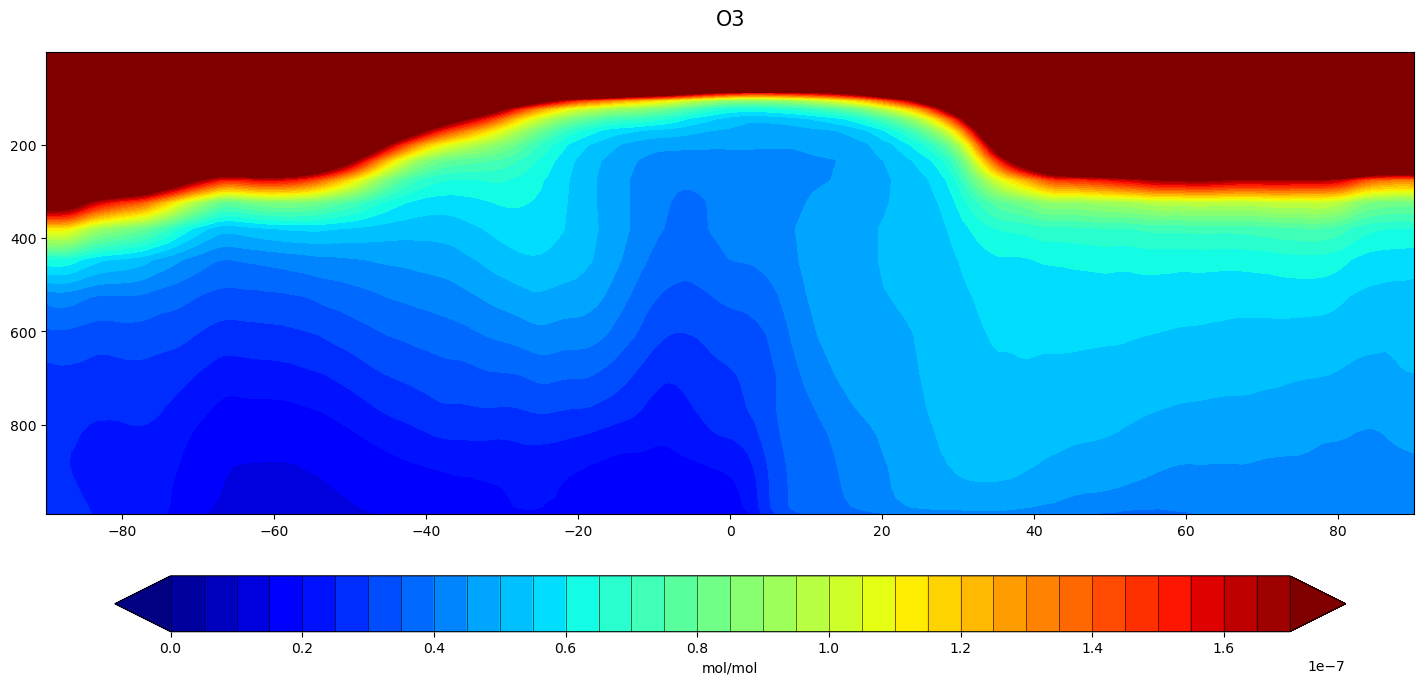

In [121]:
fig=plt.figure(figsize=(60,8))

ax1= fig.add_subplot(1,3,1)
variable = datad.O3.mean('lon')[0]
variable2 = datas_new.O3.mean('longitude')[0]
variable = variable.assign_coords({"lev_n": ("lev", np.arange(70))})
contour = variable.plot.contourf(
                            ax=ax1, 
                           # y = "lev_n",
                           levels=np.linspace(0,1.7e-7, 35),
                           extend='both',
                           cmap ='jet',
                           add_colorbar=False,
                           add_labels=False,
                            zorder=0)
ax1.invert_yaxis()
plt.colorbar(contour,
                     ax=ax1,
#                     ticks=ticks,
                     orientation='horizontal',
                     pad=0.1,
                     drawedges=True,
                     shrink=0.9,
                     label=datad.O3.units)
    


gvutil.set_titles_and_labels(ax1,maintitle='O3',
                             maintitlefontsize=15)
gvutil.set_axes_limits_and_ticks(ax1,
                  #               xticks=variable.lat,
#                                 yticks=variable.lev
                                )

#gvutil.add_major_minor_ticks(ax1, labelsize=12)
#gvutil.add_lat_lon_ticklabels(ax1)


In [42]:
## define plotting funcition
def var_plot_panels(variable, x, y,u, v, scale, nrows, ncols, i, levels, colormap, title):
    ax1= fig.add_subplot(nrows, ncols, i, projection=ccrs.PlateCarree(central_longitude=0))
    ax1.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
    ax1.add_feature(cfeature.COASTLINE, linewidth=0.5, zorder=1)
    contour = variable.plot.contourf(ax=ax1,
                           transform=ccrs.PlateCarree(),
                           levels=levels,
                           extend='both',
                            cmap = colormap,
                           add_colorbar=False,
                           add_labels=False,
                            zorder=0)

    plt.colorbar(contour,
                     ax=ax1,
#                     ticks=ticks,
                     orientation='horizontal',
                     pad=0.1,
                     drawedges=True,
                     shrink=0.9,
                     label=variable.units)
    
    csq = ax1.quiver(x, y, u, v,scale=scale)


    gvutil.set_titles_and_labels(ax1,maintitle=title,
                             maintitlefontsize=15)
    gvutil.set_axes_limits_and_ticks(ax1, xlim=(-160, -110),
                                 ylim=(15, 55),
                                 xticks=np.linspace(-160, -110, 3),
                                 yticks=np.linspace(15, 55, 5))

    gvutil.add_major_minor_ticks(ax1, labelsize=12)
    gvutil.add_lat_lon_ticklabels(ax1)
